## Loading the data and other imports

In [1]:
import numpy as np
import os

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
DATA_PATH = os.path.join('Sinhala_Word') 

sign_word = [name for name in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, name))]

sign_word = np.array(sign_word)

print(sign_word)

['no sign' 'none' 'ආසන්න වෙලා' 'ඉක්මනින්' 'ඉබ්බා' 'ඉලක්කයට' 'ඒ නිසා' 'ඔබ'
 'කපුටාට' 'කපුටෙක්' 'කෑමක්' 'කියලා' 'කේජු කෑල්ලක්' 'දවසක්' 'දිනුවා'
 'පරක්කු උණා' 'බඩගින්නෙන්' 'යන බව' 'යනවා' 'සිටියා' 'සිනහ උණා' 'සෙමෙන්'
 'සෙව්වා' 'හම්බුනා' 'හාවා' 'හාවාට' 'හාවෙක්' 'හිතනවට වඩා']


In [3]:
label_map = {label:num for num, label in enumerate(sign_word)}
label_map

{'no sign': 0,
 'none': 1,
 'ආසන්න වෙලා': 2,
 'ඉක්මනින්': 3,
 'ඉබ්බා': 4,
 'ඉලක්කයට': 5,
 'ඒ නිසා': 6,
 'ඔබ': 7,
 'කපුටාට': 8,
 'කපුටෙක්': 9,
 'කෑමක්': 10,
 'කියලා': 11,
 'කේජු කෑල්ලක්': 12,
 'දවසක්': 13,
 'දිනුවා': 14,
 'පරක්කු උණා': 15,
 'බඩගින්නෙන්': 16,
 'යන බව': 17,
 'යනවා': 18,
 'සිටියා': 19,
 'සිනහ උණා': 20,
 'සෙමෙන්': 21,
 'සෙව්වා': 22,
 'හම්බුනා': 23,
 'හාවා': 24,
 'හාවාට': 25,
 'හාවෙක්': 26,
 'හිතනවට වඩා': 27}

In [4]:
no_sequences=15
sequence_length = 89

In [5]:
sequences, labels = [], []
for action in sign_word:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(50,sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [6]:
np.array(sequences).shape

(420, 39, 1662)

In [7]:
y = to_categorical(labels).astype(int)

In [8]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [9]:
X = np.array(sequences)

#### split the data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=10)

In [11]:
y_train.shape

(252, 28)

# Model defining 

#### import of TensorFlow and Keras libraries along with specific modules and functions for constructing and training a neural network model.

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,TensorBoard
from tensorflow.keras.optimizers import Adam

In [13]:
log_dir = os.path.join('Logs_2')
tb_callback = TensorBoard(log_dir=log_dir)

#### Define a Sequential model

In [14]:
model = Sequential()
model.add(LSTM(80, return_sequences=True, activation='tanh', input_shape=(39,1662)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=False, activation='tanh'))
model.add(Dropout(0.2))
# model.add(LSTM(96, return_sequences=False, activation='tanh'))
# model.add(Dense(32, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(sign_word.shape[0], activation='softmax'))

c:\Users\Hashan\anaconda3\envs\sign_language\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 39, 80)         │       557,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 39, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 39, 64)         │        37,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 39, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │         3,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 713,820 (2.72 MB)

 Trainable params: 713,820 (2.72 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=30, restore_best_weights=True)

#### Fit the model to training data

In [18]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, callbacks=[tb_callback, early_stop])

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 349ms/step - categorical_accuracy: 0.0184 - loss: 3.3603 - val_categorical_accuracy: 0.0060 - val_loss: 3.3597
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - categorical_accuracy: 0.0384 - loss: 3.3246 - val_categorical_accuracy: 0.0060 - val_loss: 3.3723
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - categorical_accuracy: 0.0836 - loss: 3.2836 - val_categorical_accuracy: 0.0655 - val_loss: 3.3243
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - categorical_accuracy: 0.0963 - loss: 3.2186 - val_categorical_accuracy: 0.1071 - val_loss: 3.2487
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - categorical_accuracy: 0.0993 - loss: 3.1036 - val_categorical_accuracy: 0.0476 - val_loss: 3.2330
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - categorical_accuracy: 0.0597 - loss: 3.2067 - val_categorical_accuracy: 0.0179 - val_loss: 3.3057
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - categorical_accuracy: 0.0736 - loss: 3.0

#### Evaluate the performance of LSTM model

In [19]:
res = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step


In [20]:
sign_word[np.argmax(res[14])]

'සිනහ උණා'

In [21]:
sign_word[np.argmax(y_test[14])]

'සිනහ උණා'

In [22]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [23]:
yhat = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [24]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [25]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[162,   0],
        [  4,   2]],

       [[160,   0],
        [  0,   8]],

       [[163,   0],
        [  0,   5]],

       [[160,   3],
        [  2,   3]],

       [[159,   2],
        [  1,   6]],

       [[160,   2],
        [  0,   6]],

       [[158,   2],
        [  4,   4]],

       [[156,   4],
        [  2,   6]],

       [[162,   1],
        [  1,   4]],

       [[163,   0],
        [  2,   3]],

       [[158,   4],
        [  2,   4]],

       [[162,   0],
        [  1,   5]],

       [[160,   0],
        [  0,   8]],

       [[163,   1],
        [  2,   2]],

       [[160,   1],
        [  1,   6]],

       [[162,   1],
        [  0,   5]],

       [[160,   0],
        [  0,   8]],

       [[157,   4],
        [  0,   7]],

       [[158,   1],
        [  5,   4]],

       [[160,   1],
        [  2,   5]],

       [[160,   0],
        [  0,   8]],

       [[159,   8],
        [  1,   0]],

       [[163,   1],
        [  3,   1]],

       [[164,   1],
        [  1, 

In [26]:
accuracy_score(ytrue, yhat)

0.75

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:


def plot_confusion_matrix(y_true, y_pred, classes, figsize=(12, 8), cmap=plt.cm.Blues):

    cm = confusion_matrix(y_true, y_pred) 
    
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, cmap=cmap, fmt=".2f", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()

In [30]:
print(classification_report(ytrue, yhat))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         5
           3       0.50      0.60      0.55         5
           4       0.75      0.86      0.80         7
           5       0.75      1.00      0.86         6
           6       0.67      0.50      0.57         8
           7       0.60      0.75      0.67         8
           8       0.80      0.80      0.80         5
           9       1.00      0.60      0.75         5
          10       0.50      0.67      0.57         6
          11       1.00      0.83      0.91         6
          12       1.00      1.00      1.00         8
          13       0.67      0.50      0.57         4
          14       0.86      0.86      0.86         7
          15       0.83      1.00      0.91         5
          16       1.00      1.00      1.00         8
          17       0.64    

c:\Users\Hashan\anaconda3\envs\sign_language\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hashan\anaconda3\envs\sign_language\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hashan\anaconda3\envs\sign_language\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [31]:
english_words =["no sign", "none", "asanna wela", "ikmanin", "ibba", "ilakkayata", "a nisa", "oba", "kaputata", "kaputek", "kamak", "kiyala", "keju kalla", "dawasak", 
                "dinuwa", "parakku una", "badaginnen", "yanabawa", "yanawa", "sitiya", "sinaha una", "semen", "sewwa", "hambuna", "hawa", "hawata", "hawek", "hithanawata wada" ]

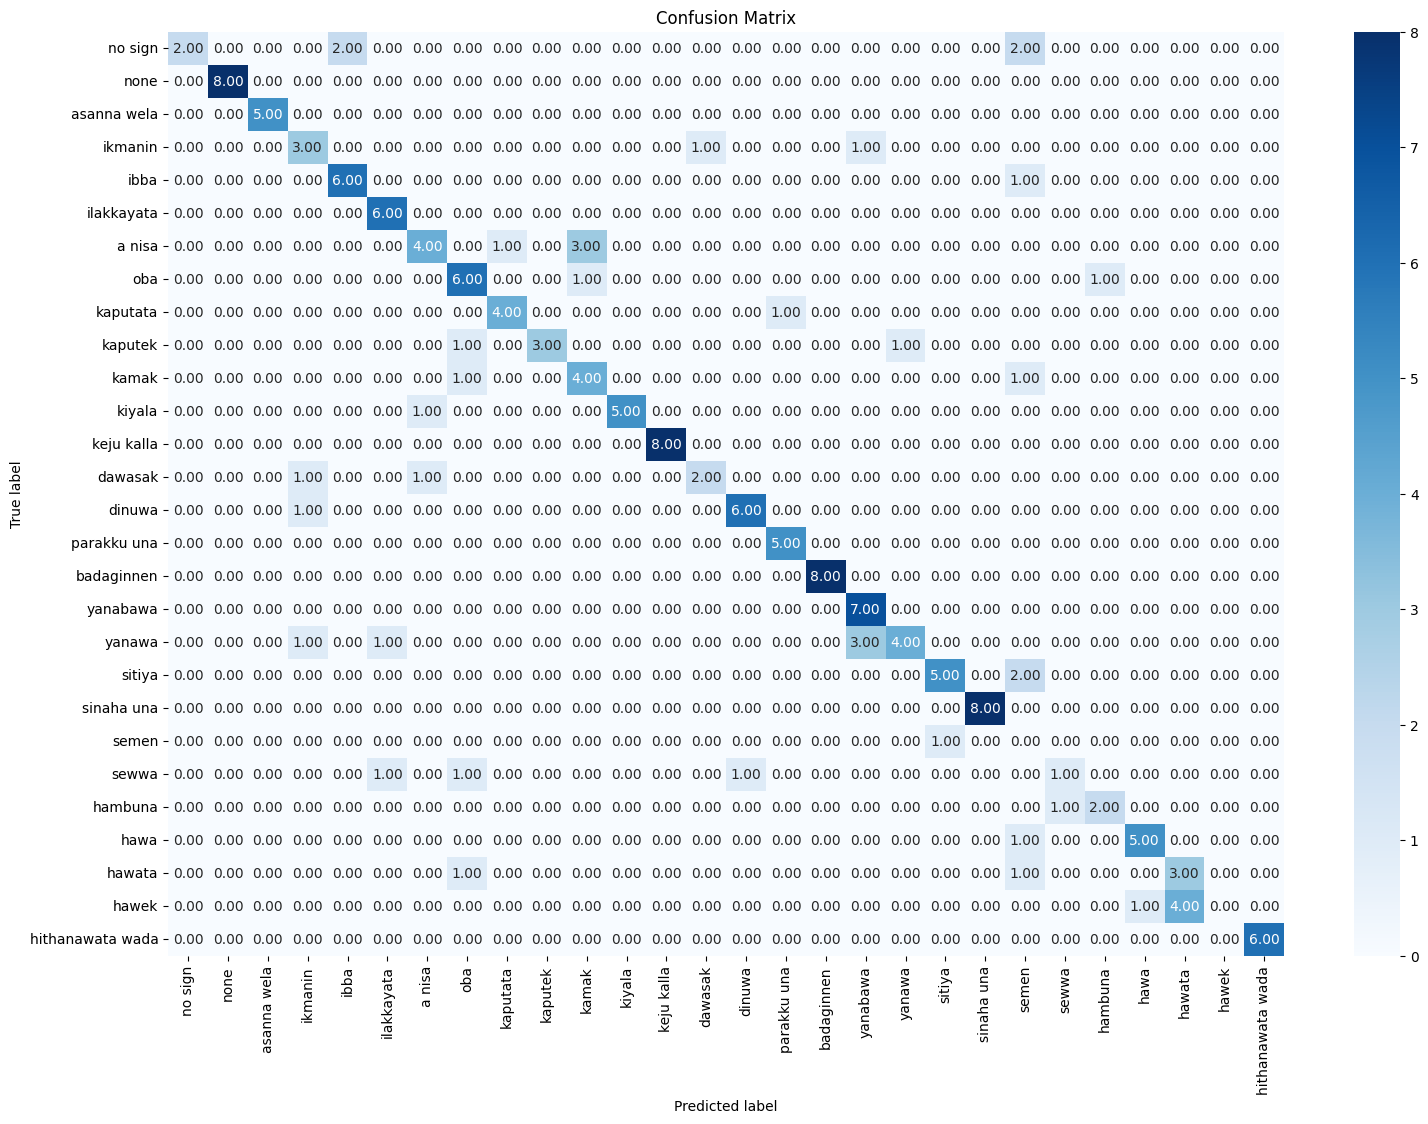

In [32]:
plot_confusion_matrix(ytrue, yhat, english_words, figsize=(18, 12))

## Hyperparameter Optimization of LSTM Network

In [33]:
def model_builder(hp):
    model = Sequential()

    hp_activation = hp.Choice('activation', values=["relu", "tanh"])
    hp_layer1 = hp.Int("layer_1", min_value=16, max_value=128, step=16)
    hp_layer2 = hp.Int("layer_2", min_value=32, max_value=128, step=32)
    # hp_layer3 = hp.Int("layer_3", min_value=128, max_value=256, step=32)
    hp_layer4 = hp.Int("layer_4", min_value=64, max_value=160, step=32)
    hp_layer5 = hp.Int("layer_5", min_value=64, max_value=128, step=16)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_dropout = hp.Float('dropout', min_value=0.0, max_value=0.2, step=0.1)

    model.add(LSTM(units=hp_layer1, activation=hp_activation, return_sequences=True, input_shape=(39, 1662)))
    model.add(Dropout(rate=hp_dropout))
    model.add(LSTM(units=hp_layer2, activation=hp_activation, return_sequences=True))
    model.add(Dropout(rate=hp_dropout))
    # model.add(LSTM(units=hp_layer3, activation=hp_activation, return_sequences=True))
    # model.add(Dropout(rate=hp_dropout))
    model.add(LSTM(units=hp_layer4, activation=hp_activation, return_sequences=False))
    model.add(Dropout(rate=hp_dropout))
    model.add(Dense(units=hp_layer5, activation=hp_activation))
    model.add(Dropout(rate=hp_dropout))
    model.add(Dense(sign_word.shape[0], activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=hp_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [34]:
import keras_tuner as kt

In [35]:
tuner = kt.Hyperband(model_builder, objective='val_accuracy', max_epochs=100, factor=3, directory='my_dir', project_name='sign_language')

Reloading Tuner from my_dir\sign_language\tuner0.json


In [36]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=30)

In [37]:
tuner.search(X_train, y_train, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stop])

In [38]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [39]:
print(f"""
The best hyperparameters are:
- Activation: {best_hps.get('activation')}
- Layer 1 units: {best_hps.get('layer_1')}
- Layer 2 units: {best_hps.get('layer_2')} 
- Layer 4 units: {best_hps.get('layer_4')}
- Layer 5 units: {best_hps.get('layer_5')}
- DropOut layer: {best_hps.get('dropout')}
- Learning rate: {best_hps.get('learning_rate')}
""")


The best hyperparameters are:
- Activation: tanh
- Layer 1 units: 112
- Layer 2 units: 96 
- Layer 4 units: 96
- Layer 5 units: 112
- DropOut layer: 0.2
- Learning rate: 0.001



In [40]:
best_model = tuner.get_best_models(num_models=1)[0]

c:\Users\Hashan\anaconda3\envs\sign_language\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\Hashan\anaconda3\envs\sign_language\lib\site-packages\keras_tuner\src\tuners\hyperband.py:435: UserWarning: Model 'sequential' had a build config, but the model cannot be built automatically in `build_from_config(config)`. You should implement `def build_from_config(self, config)`, and you might also want to implement the method  that generates the config at saving time, `def get_build_config(self)`. The method `build_from_config()` is meant to create the state of the model (i.e. its variables) upon deserialization.
  model.build_from_config(
c:\Users\Hashan\anaconda3\envs\sign_language\lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loa

In [41]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=30, restore_best_weights=True)

### training the best model

In [42]:
history = best_model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 397ms/step - accuracy: 0.3872 - loss: 2.4478 - val_accuracy: 0.5655 - val_loss: 1.5578
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step - accuracy: 0.5677 - loss: 1.4051 - val_accuracy: 0.6488 - val_loss: 1.2719
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - accuracy: 0.6464 - loss: 1.1450 - val_accuracy: 0.6190 - val_loss: 1.0979
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step - accuracy: 0.7229 - loss: 0.8522 - val_accuracy: 0.6131 - val_loss: 1.2441
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - accuracy: 0.7372 - loss: 0.8800 - val_accuracy: 0.7679 - val_loss: 0.7395
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - accuracy: 0.8331 - loss: 0.5542 - val_accuracy: 0.7976 - val_loss: 0.6811
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - accuracy: 0.8669 - loss: 0.4955 - val_accuracy: 0.7381 - val_loss: 0.7370
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 238ms/step - accuracy: 0.8534 - loss: 0.4975 - val_accuracy: 0.7321 - 

### Evaluate the performance of Best model

In [43]:
best_prediction = best_model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step


In [44]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(best_prediction, axis=1).tolist()

In [45]:
accuracy_score(ytrue, yhat)

0.8988095238095238

In [46]:
print(classification_report(ytrue, yhat))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         8
           2       0.83      1.00      0.91         5
           3       0.80      0.80      0.80         5
           4       0.78      1.00      0.88         7
           5       1.00      1.00      1.00         6
           6       1.00      0.75      0.86         8
           7       1.00      0.88      0.93         8
           8       1.00      1.00      1.00         5
           9       0.83      1.00      0.91         5
          10       1.00      1.00      1.00         6
          11       0.86      1.00      0.92         6
          12       1.00      1.00      1.00         8
          13       0.80      1.00      0.89         4
          14       1.00      0.86      0.92         7
          15       0.80      0.80      0.80         5
          16       1.00      1.00      1.00         8
          17       1.00    

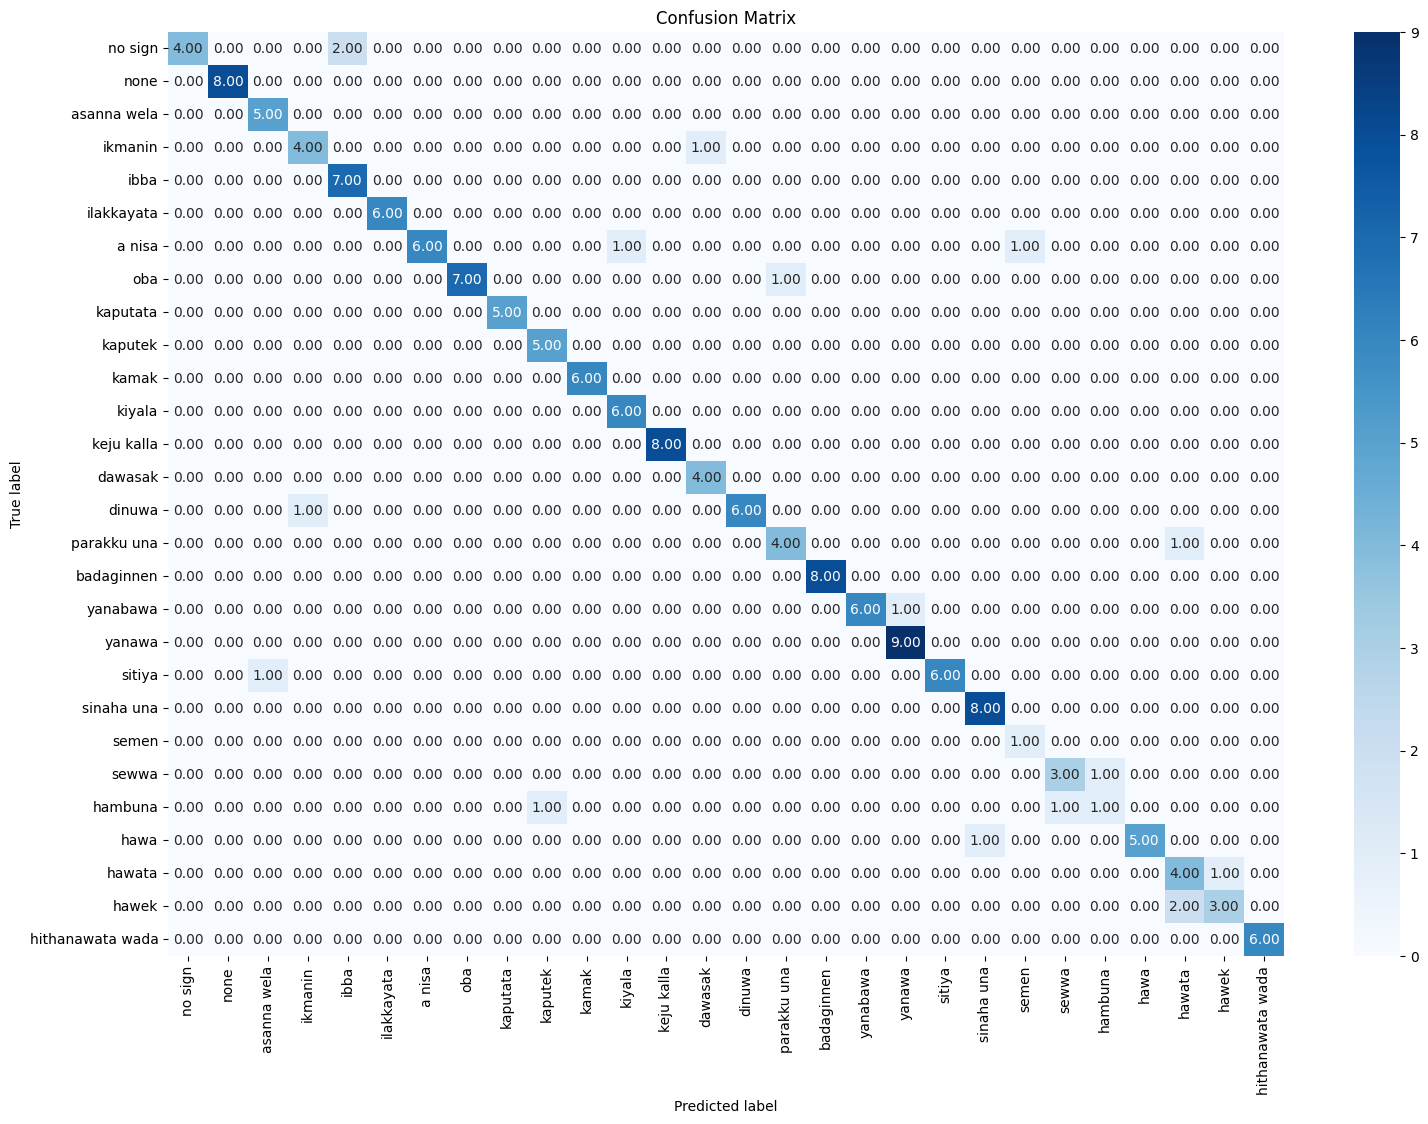

In [47]:
plot_confusion_matrix(ytrue, yhat, english_words, figsize=(18, 12))

In [49]:
best_model.save("all_frame_model.h5")